
<div style = "text-align:center;"><span style="font-size: 26px; font-weight:bold;">AIR QUALITY CLASSIFICATION</span>
</div>

In [130]:
#pip install --trusted-host pypi.org --trusted-host files.pythonhosted.org pycaret

In [312]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report,ConfusionMatrixDisplay,precision_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import skew, kurtosis
from sklearn.model_selection import GridSearchCV
import pickle


In [132]:
df=pd.read_excel('pollution_dataset.xlsx')

In [133]:
df.columns

Index(['Temperature', 'Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO',
       'Proximity_to_Industrial_Areas', 'Population_Density', 'Air Quality'],
      dtype='object')

In [134]:
df.head() #shows first five samples in the dataset

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
1,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good
2,39.4,96.6,14.6,35.5,42.9,17.9,1.82,3.1,674,Poor
3,41.7,82.5,1.7,15.8,31.1,12.7,1.80,4.6,735,Poor
4,29.4,93.8,10.3,22.7,45.1,11.8,2.03,5.4,486,Poor



<span style="font-size: 22px; font-weight:bold;">CHECKING FOR NULL VALUES</span>


In [135]:
df.info()  #helps in checking if there are any null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    4250 non-null   float64
 1   Humidity                       4250 non-null   float64
 2   PM2.5                          4250 non-null   float64
 3   PM10                           4250 non-null   float64
 4   NO2                            4250 non-null   float64
 5   SO2                            4250 non-null   float64
 6   CO                             4250 non-null   float64
 7   Proximity_to_Industrial_Areas  4250 non-null   float64
 8   Population_Density             4250 non-null   int64  
 9   Air Quality                    4250 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 332.2+ KB


In [136]:
df.isnull().sum()  #another method that helps in checking if there are any null values

Temperature                      0
Humidity                         0
PM2.5                            0
PM10                             0
NO2                              0
SO2                              0
CO                               0
Proximity_to_Industrial_Areas    0
Population_Density               0
Air Quality                      0
dtype: int64

These results shows that there is no null values in the dataset.


<span style="font-size: 22px;font-weight:bold;">CHECKING FOR DUPLICATE ROWS</span>

In [137]:
df.duplicated().sum()

0

This result shows that there are no duplicate rows in the dataset.

<span style="font-size: 22px;font-weight:bold;">CHECKING FOR INVALID DATA TYPES</span>

In [138]:
df.dtypes

Temperature                      float64
Humidity                         float64
PM2.5                            float64
PM10                             float64
NO2                              float64
SO2                              float64
CO                               float64
Proximity_to_Industrial_Areas    float64
Population_Density                 int64
Air Quality                       object
dtype: object

In [139]:
check = ['Temperature', 'Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO',
       'Proximity_to_Industrial_Areas']

for i in check:
    invalid = df[~df[i].apply(lambda x: isinstance(x,float))]
    if not invalid.empty:
        print("Invalid data type values found in column ",i)
    else:
        print("No invalid data type values in Column ",i)


No invalid data type values in Column  Temperature
No invalid data type values in Column  Humidity
No invalid data type values in Column  PM2.5
No invalid data type values in Column  PM10
No invalid data type values in Column  NO2
No invalid data type values in Column  SO2
No invalid data type values in Column  CO
No invalid data type values in Column  Proximity_to_Industrial_Areas


In [140]:
#Population Density - int
invalid_pop= df[~df['Population_Density'].apply(lambda x: isinstance(x,int))]
if not invalid_pop.empty:
    print("Invalid data type values found in the column")
else:
    print("No invalid data type values in the column")

No invalid data type values in the column


In [141]:
#Air Quality - categorical type
invalid_air=df[~df['Air Quality'].isin(["Poor","Good"])]
if not invalid_air.empty:
    print("Invalid data type values found in the column")
else:
    print("No invalid data type values in the column")

No invalid data type values in the column


These results shows that there are no invalid data type in the dataset.

<span style="font-size: 22px; font-weight:bold;">CHECKING FOR INVALID DATA VALUES </span>

In [142]:
df.columns

Index(['Temperature', 'Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO',
       'Proximity_to_Industrial_Areas', 'Population_Density', 'Air Quality'],
      dtype='object')

'Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'Proximity_to_Industrial_Areas', 'Population_Density' columns cannot have negative values.  
Checking for negative values: 

In [143]:
check_column=['Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO',
       'Proximity_to_Industrial_Areas', 'Population_Density']

for i in check_column:
    if not df[df[i]<0].empty:
        print("Negative values found in column ",i)
        #print(df[df[i]<0])


Negative values found in column  PM10
Negative values found in column  SO2


In [144]:
#PM10
if not df[df['PM10']<0].empty:
    print("Negative values found in column ",i)
    print(df[df['PM10']<0])

else:
    print("Empty")


Negative values found in column  Population_Density
    Temperature  Humidity  PM2.5  PM10   NO2  SO2    CO  \
14         25.6      58.3    0.4  -0.2  25.3  4.5  0.98   

    Proximity_to_Industrial_Areas  Population_Density Air Quality  
14                           10.0                 536        Good  


In [145]:
#SO2
if not df[df['SO2']<0].empty:
    print("Negative values found in column ",i)
    print(df[df['SO2']<0])

else:
    print("Empty")

Negative values found in column  Population_Density
      Temperature  Humidity  PM2.5  PM10   NO2  SO2    CO  \
142          25.9      64.2    1.5  10.3  23.6 -0.4  0.93   
248          24.3      44.2    9.5  12.5  18.8 -0.2  0.83   
321          26.5      59.9   92.7  98.0  25.4 -0.5  0.92   
331          25.0      77.9    2.1   8.6  12.3 -0.3  1.09   
357          40.1      62.1   47.7  67.7  31.6 -4.1  2.54   
397          23.9      54.6    0.8   5.8  18.0 -0.6  0.92   
545          26.7      66.0    0.5   5.4  20.9 -0.6  0.87   
705          21.8      72.4    4.0   7.5  19.4 -0.3  1.15   
728          24.4      63.7   31.1  34.2  16.4 -0.2  0.99   
1038         36.0      89.8   33.0  47.9  26.0 -0.1  1.74   
1222         44.1      72.6   66.5  86.1  33.2 -0.2  2.49   
1416         21.5      61.4    4.2  10.4  22.1 -0.1  0.95   
1681         32.7      82.0   64.9  78.4  30.5 -1.9  1.93   
1721         41.2      86.9   26.7  40.8  39.5 -0.2  1.62   
1860         30.4     103.6   17.

In [146]:
(df['SO2']<0).sum() #checking number of negative values

24

Negative values can be handled by replacing them with mean or median values of the column. The choice between mean and  median is based on whether there are outliers in the data.
If there are outliers, then median. Else, mean.

<Axes: >

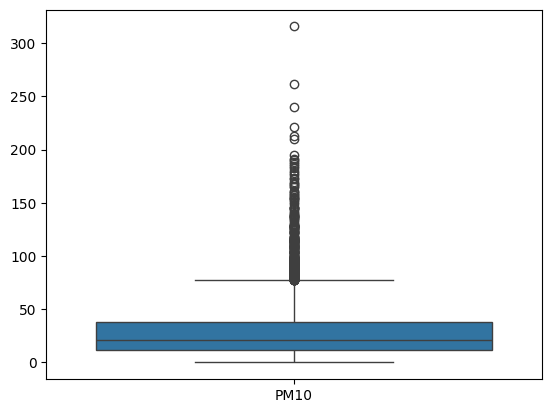

In [147]:
#checking outliers for PM10
sn.boxplot([df['PM10']])

<Axes: >

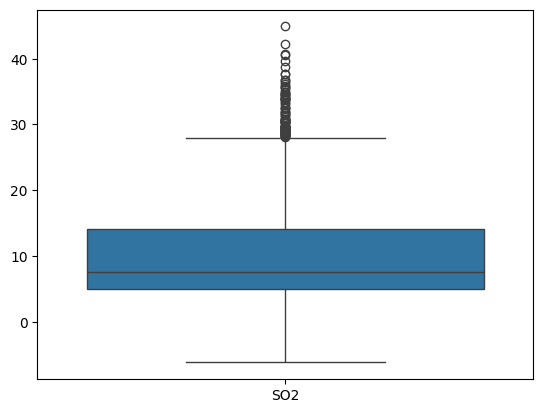

In [148]:
#checking outliers for SO2
sn.boxplot([df['SO2']])

There are outliers in both PM10 and SO2. So we can use median to replace the negative values.

In [149]:
#replacing negative values in PM10 and SO2
df['PM10'] = df['PM10'].apply(lambda x: df['PM10'].median() if x<0 else x)
df['SO2'] = df['SO2'].apply(lambda x: df['SO2'].median() if x<0 else x)

In [150]:
#crosschecking if the negative values are removed
#PM10
if not df[df['PM10']<0].empty:
    print("Negative values found in column ",i)
    print(df[df['PM10']<0])

else:
    print("Empty")

#SO2
if not df[df['SO2']<0].empty:
    print("Negative values found in column ",i)
    print(df[df['SO2']<0])

else:
    print("Empty")

Empty
Empty


In [151]:
dataframe=df # storing the dataframe for later use

<span style="font-size: 22px; font-weight:bold;">FEATURE SCALING </span>

In [152]:
df.describe()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,30.021671,69.935576,20.057929,30.156518,26.399671,10.052400,1.500428,8.684212,497.283059
std,7.079486,16.402863,25.140063,28.291211,9.415399,7.064533,0.586232,3.778317,158.671435
min,13.400000,36.000000,0.000000,0.000000,7.400000,0.000000,0.650000,2.500000,188.000000
25%,24.700000,57.800000,4.500000,11.700000,19.500000,4.900000,1.010000,5.225000,376.000000
50%,28.700000,69.600000,11.600000,21.200000,25.000000,7.500000,1.310000,9.700000,494.000000
75%,34.500000,80.200000,25.600000,37.800000,32.500000,14.175000,1.930000,11.300000,601.000000
max,58.600000,128.100000,295.000000,315.800000,64.900000,44.900000,3.720000,25.800000,957.000000


CO feature is in the range of one's.  
Temperature, NO2, SO2 are in the range of ten's.  
Humidity, PM2.5 and PM10 are the range of hundred's.  

As the features are in different ranges, we have to scale the values to bring it down to a same scale. 


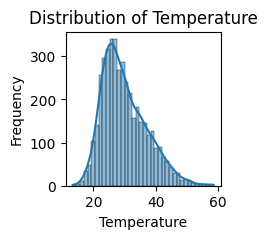

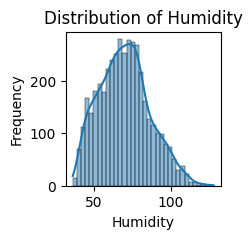

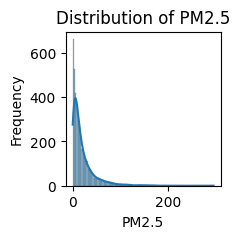

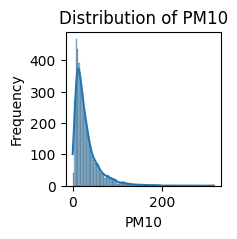

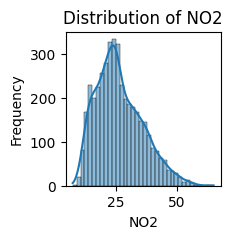

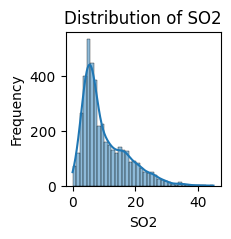

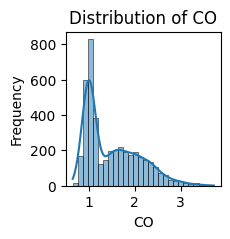

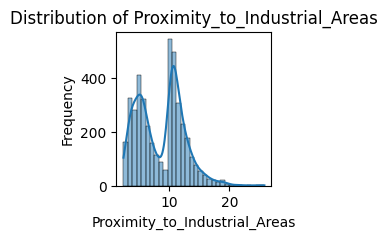

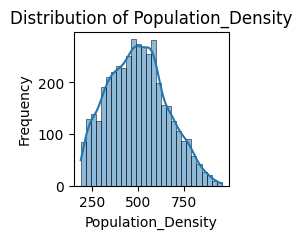

In [153]:
columns=df.drop('Air Quality', axis=1)
for i in columns:
    plt.figure(figsize=(2,2))
    sn.histplot(df[i], kde=True)
    plt.title(f"Distribution of {i}")
    plt.xlabel(i)
    plt.ylabel("Frequency")
    plt.show()

There are two main scaling techniques - Standardization and Normalization. Standardization is used usually when the data has a normal distribution. If not, Min-Max Scaling/ Normalization technique is used.

In [154]:
scaler = MinMaxScaler()
scaling= scaler.fit_transform(df.drop(columns=['Air Quality']))
data=pd.DataFrame(scaling, columns = df.columns[:-1])
data['Air Quality']=df['Air Quality']
df=data
print(data.head())

   Temperature  Humidity     PM2.5      PM10       NO2       SO2        CO  \
0     0.303097  0.033659  0.020678  0.019949  0.106087  0.118040  0.162866   
1     0.289823  0.376764  0.023390  0.050665  0.252174  0.124722  0.117264   
2     0.575221  0.657980  0.049492  0.112413  0.617391  0.398664  0.381107   
3     0.626106  0.504886  0.005763  0.050032  0.412174  0.282851  0.374593   
4     0.353982  0.627579  0.034915  0.071881  0.655652  0.262806  0.449511   

   Proximity_to_Industrial_Areas  Population_Density Air Quality  
0                       0.369099            0.472042        Good  
1                       0.437768            0.149545        Good  
2                       0.025751            0.631990        Poor  
3                       0.090129            0.711313        Poor  
4                       0.124464            0.387516        Poor  


In [155]:
df=data
print(df.head())

   Temperature  Humidity     PM2.5      PM10       NO2       SO2        CO  \
0     0.303097  0.033659  0.020678  0.019949  0.106087  0.118040  0.162866   
1     0.289823  0.376764  0.023390  0.050665  0.252174  0.124722  0.117264   
2     0.575221  0.657980  0.049492  0.112413  0.617391  0.398664  0.381107   
3     0.626106  0.504886  0.005763  0.050032  0.412174  0.282851  0.374593   
4     0.353982  0.627579  0.034915  0.071881  0.655652  0.262806  0.449511   

   Proximity_to_Industrial_Areas  Population_Density Air Quality  
0                       0.369099            0.472042        Good  
1                       0.437768            0.149545        Good  
2                       0.025751            0.631990        Poor  
3                       0.090129            0.711313        Poor  
4                       0.124464            0.387516        Poor  


<span style="font-size: 22px; font-weight:bold;">ENCODING CATEGORICAL DATA</span>

Since 'Air Quality' is the target variable and since it is categorical in nature, we should convert it into numerical values.

In [156]:
df['Air Quality'] = df['Air Quality'].map({'Good':1, 'Poor':0}) #good category is assigned with value 1 and poor as 0.

In [157]:
df.head() #checking

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,0.303097,0.033659,0.020678,0.019949,0.106087,0.118040,0.162866,0.369099,0.472042,1
1,0.289823,0.376764,0.023390,0.050665,0.252174,0.124722,0.117264,0.437768,0.149545,1
2,0.575221,0.657980,0.049492,0.112413,0.617391,0.398664,0.381107,0.025751,0.631990,0
3,0.626106,0.504886,0.005763,0.050032,0.412174,0.282851,0.374593,0.090129,0.711313,0
4,0.353982,0.627579,0.034915,0.071881,0.655652,0.262806,0.449511,0.124464,0.387516,0


<span style="font-size: 22px; font-weight:bold;">TEST AND TRAIN SPLIT</span>

In [158]:
x= df.loc[:, df.columns!='Air Quality']

In [159]:
x.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density
0,0.303097,0.033659,0.020678,0.019949,0.106087,0.118040,0.162866,0.369099,0.472042
1,0.289823,0.376764,0.023390,0.050665,0.252174,0.124722,0.117264,0.437768,0.149545
2,0.575221,0.657980,0.049492,0.112413,0.617391,0.398664,0.381107,0.025751,0.631990
3,0.626106,0.504886,0.005763,0.050032,0.412174,0.282851,0.374593,0.090129,0.711313
4,0.353982,0.627579,0.034915,0.071881,0.655652,0.262806,0.449511,0.124464,0.387516


In [160]:
y=df['Air Quality']

In [161]:
y.head()

0    1
1    1
2    0
3    0
4    0
Name: Air Quality, dtype: int64

In [162]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,stratify=y,random_state=42) # 80:20 split

<span style="font-size: 22px; font-weight:bold;">LOGISTIC REGRESSION </span>

In [163]:
model1=LogisticRegression(max_iter=500)
model1.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [164]:
training_pred= model1.predict(X_train)
training_accuracy = accuracy_score(y_train, training_pred)
print("Training Accuracy", training_accuracy)

predictions= model1.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Testing Accuracy", accuracy )


Training Accuracy 0.9723529411764706
Testing Accuracy 0.9705882352941176


Testing accuracy, training accuracy values are very close and are high. Therefore, there is no significant overfitting/underfitting in the model.

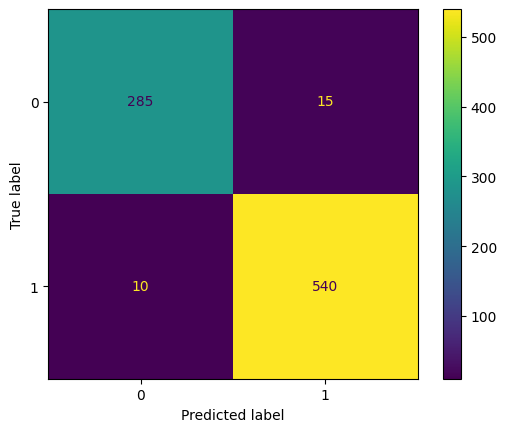

In [165]:
#calculates True Positive, False Positive, True Negative and False Negative.
# shows in detail how the model performed

confusionmatrix= confusion_matrix(y_test, predictions) 
matrix=ConfusionMatrixDisplay(confusion_matrix=confusionmatrix, display_labels=[0,1])
matrix.plot()
plt.show()

In [166]:
#defining the model as a function for later use.
def logisticregression(x_train, y_train, x_test, y_test): 
    
    model1=LogisticRegression(max_iter=500)
    model1.fit(x_train, y_train)

    training_pred= model1.predict(x_train)
    training_accuracy = accuracy_score(y_train, training_pred)
    print("Training Accuracy", training_accuracy)
    
    predictions= model1.predict(x_test)
    accuracy = accuracy_score(y_test, predictions)
    print("Testing Accuracy", accuracy )


<span style="font-size: 22px; font-weight:bold;">RANDOM FOREST</span>

In [167]:
model3=RandomForestClassifier(n_estimators=100, max_depth=None,min_samples_split=5, min_samples_leaf=5)

In [168]:
model3.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=5, min_samples_split=5)

In [169]:
training_pred= model3.predict(X_train)
training_accuracy = accuracy_score(y_train, training_pred)
print("Training Accuracy", training_accuracy)

crossvalscore= cross_val_score(model3,x,y, cv=5, scoring='accuracy')
print("Cross Validation Score",crossvalscore)

test_predictions= model3.predict(X_test)
accuracy = accuracy_score(y_test, test_predictions)
print("Testing Accuracy", accuracy )

Training Accuracy 0.9908823529411764
Cross Validation Score [0.98470588 0.99294118 0.97176471 0.96235294 0.97882353]
Testing Accuracy 0.9811764705882353


The testing accuracy is little lower than training accuracy. This shows that the data might be overfitted slightly.

One method to reduce overfitting is to increase the training set size.

In [170]:
#train_test_split ratio changed to 90:10
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1,stratify=y,random_state=42) 

model3=RandomForestClassifier(n_estimators=100, max_depth=None,min_samples_split=5, min_samples_leaf=5)
model3.fit(x_train, y_train)

training_pred= model3.predict(x_train)
training_accuracy = accuracy_score(y_train, training_pred)
print("Training Accuracy", training_accuracy)

crossvalscore= cross_val_score(model3,x,y, cv=5, scoring='accuracy')
print("Cross Validation Score",crossvalscore)

test_predictions= model3.predict(x_test)
accuracy = accuracy_score(y_test, test_predictions)
print("Testing Accuracy", accuracy )


Training Accuracy 0.9916339869281046
Cross Validation Score [0.98705882 0.99176471 0.98       0.96705882 0.97411765]
Testing Accuracy 0.9741176470588235


In [171]:
len(x_train)

3825

The accuracies shows that there is no much change in overfitting even after increasing training set data size.  
Further increasing of the training set size is not possible, since the test set would contain really small number of samples then.

Using trail and error method to optimize parameters of Random forest:

In [172]:
model3_upd=RandomForestClassifier(n_estimators=100, max_depth=3,min_samples_split=5, min_samples_leaf=5)
model3_upd.fit(x_train, y_train)

training_pred= model3_upd.predict(x_train)
training_accuracy = accuracy_score(y_train, training_pred)
print("Training Accuracy", training_accuracy)

crossvalscore= cross_val_score(model3_upd,x,y, cv=5, scoring='accuracy')
print("Cross Validation Score",crossvalscore)

test_predictions= model3_upd.predict(x_test)
accuracy = accuracy_score(y_test, test_predictions)
print("Testing Accuracy", accuracy )

Training Accuracy 0.9769934640522876
Cross Validation Score [0.98       0.98588235 0.96470588 0.95764706 0.96      ]
Testing Accuracy 0.9623529411764706


There is a slight improvement in the model when max_depth was changed to 3. Testing and training accuracy values are close now.

In [173]:
#defining the model in a function for later use.
def randomforest(x_train, y_train, x_test, y_test):
    model3_upd=RandomForestClassifier(n_estimators=100, max_depth=3,min_samples_split=5, min_samples_leaf=5)
    model3_upd.fit(x_train, y_train)

    training_pred= model3_upd.predict(x_train)
    training_accuracy = accuracy_score(y_train, training_pred)
    print("Training Accuracy", training_accuracy)

    test_predictions= model3_upd.predict(x_test)
    accuracy = accuracy_score(y_test, test_predictions)
    print("Testing Accuracy", accuracy )

    

<span style="font-size: 22px; font-weight:bold;">UNIVARIATE ANALYSIS</span>

In [174]:
dataframe.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
1,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good
2,39.4,96.6,14.6,35.5,42.9,17.9,1.82,3.1,674,Poor
3,41.7,82.5,1.7,15.8,31.1,12.7,1.80,4.6,735,Poor
4,29.4,93.8,10.3,22.7,45.1,11.8,2.03,5.4,486,Poor


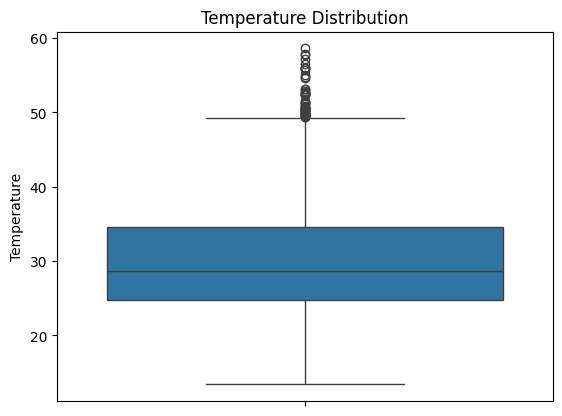

In [175]:
# FEATURE 1 - TEMPERATURE

sn.boxplot(dataframe['Temperature'])
plt.title('Temperature Distribution')
plt.show()

There are outliers in the data. But they necessarily wont be error/invalid data because spikes can happen in environmental data because of extreme pollution or weather events.   
The data is little right-skewed ( right tail is longer than left tail)  
To check the skewness, we can use skew function in scipy or can interpret it from statistical values like mean and median. 


In [176]:
print("Mean: ", dataframe['Temperature'].mean())
print("Median: ", dataframe['Temperature'].median())

Mean:  30.021670588235295
Median:  28.7


If mean is greater than median -> Right Skewed  
If mean is less than median -> Left Skewed  
If mean is almost equal to  median -> Normal Distribution   
Here mean is greater than median. This shows that the data is right-skewed.

In [177]:
from scipy.stats import skew, kurtosis
print("Skewness:  ", skew(dataframe['Temperature']))
print("Kurtosis: ", kurtosis(dataframe['Temperature']))

Skewness:   0.7566563159758903
Kurtosis:  0.29536600006593616


Skewness value greater than zero indicates positive skewness.  
Kurtosis value closer to zero indicates, data has few outliers. 

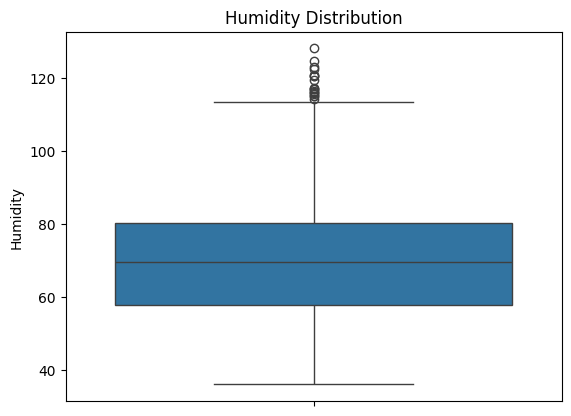

In [178]:
# FEATURE 2 - HUMIDITY

sn.boxplot(dataframe['Humidity'])
plt.title('Humidity Distribution')
plt.show()

In [179]:
print("Mean: ", dataframe['Humidity'].mean())
print("Median: ", dataframe['Humidity'].median())
print("Skewness:  ", skew(dataframe['Humidity']))
print("Kurtosis: ", kurtosis(dataframe['Humidity']))

Mean:  69.93557647058823
Median:  69.6
Skewness:   0.31564102031833696
Kurtosis:  -0.31417197131744556


Mean and median values are close. Very less skewness is present

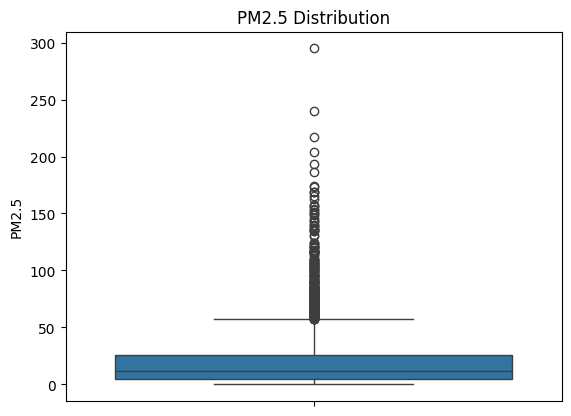

In [180]:
# FEATURE 3 - PM2.5

sn.boxplot(dataframe['PM2.5'])
plt.title('PM2.5 Distribution')
plt.show()

In [181]:
print("Mean: ", dataframe['PM2.5'].mean())
print("Median: ", dataframe['PM2.5'].median())
print("Skewness:  ", skew(dataframe['PM2.5']))
print("Kurtosis: ", kurtosis(dataframe['PM2.5']))

Mean:  20.057929411764704
Median:  11.6
Skewness:   2.956141903968115
Kurtosis:  13.346870545084947


The data is highly skewed to rightside, kurtosis also has a very high value. This shows the presence of extreme outliers.

In [182]:
dataframe['Log_PM2.5'] = dataframe['PM2.5'].apply(lambda x:np.log(x+1))

In [183]:
print("Mean: ", dataframe['Log_PM2.5'].mean())
print("Median: ", dataframe['Log_PM2.5'].median())
print("Skewness:  ", skew(dataframe['Log_PM2.5']))
print("Kurtosis: ", kurtosis(dataframe['Log_PM2.5']))

Mean:  2.4831861474880697
Median:  2.533696813957432
Skewness:   -0.07305135934967712
Kurtosis:  -0.5590468226910859


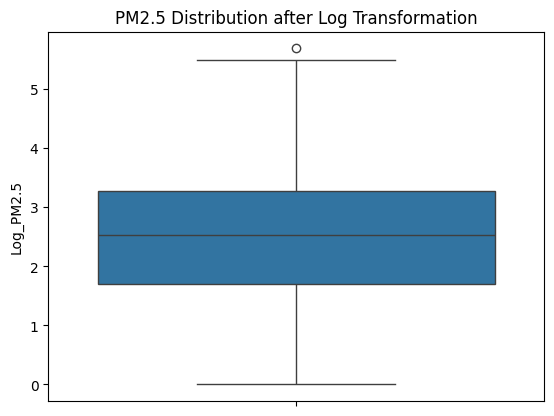

In [184]:
sn.boxplot(dataframe['Log_PM2.5'])
plt.title('PM2.5 Distribution after Log Transformation')
plt.show()

Mean and median values are close now. Skewness and Kurtosis value have also decreased. This indicates that the impact of outliers is reduced and the distribution is more normal now.

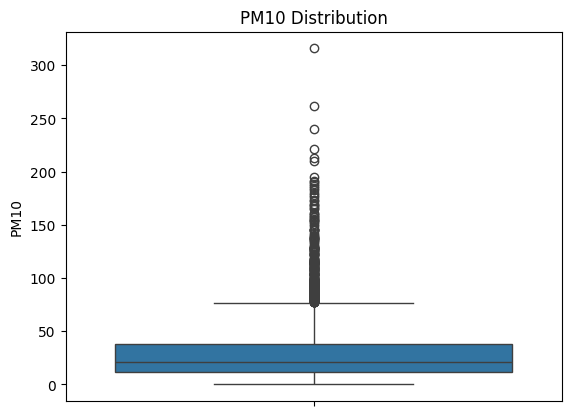

In [185]:
# FEATURE 4 - PM10

sn.boxplot(dataframe['PM10'])
plt.title('PM10 Distribution')
plt.show()

In [186]:
print("Mean: ", dataframe['PM10'].mean())
print("Median: ", dataframe['PM10'].median())
print("Skewness:  ", skew(dataframe['PM10']))
print("Kurtosis: ", kurtosis(dataframe['PM10']))

Mean:  30.156517647058823
Median:  21.2
Skewness:   2.5499650723246714
Kurtosis:  10.141088054347394


This feature is also highly right skewed. Kurtosis value is also high. So this feature is also having extreme outlier points.

In [187]:
dataframe['Log_PM10'] = dataframe['PM10'].apply(lambda x:np.log(x+1))

In [188]:
print("Mean: ", dataframe['Log_PM10'].mean())
print("Median: ", dataframe['Log_PM10'].median())
print("Skewness:  ", skew(dataframe['Log_PM10']))
print("Kurtosis: ", kurtosis(dataframe['Log_PM10']))

Mean:  3.1221793239146924
Median:  3.100092288878234
Skewness:   0.11759345148198641
Kurtosis:  -0.26421103149557945


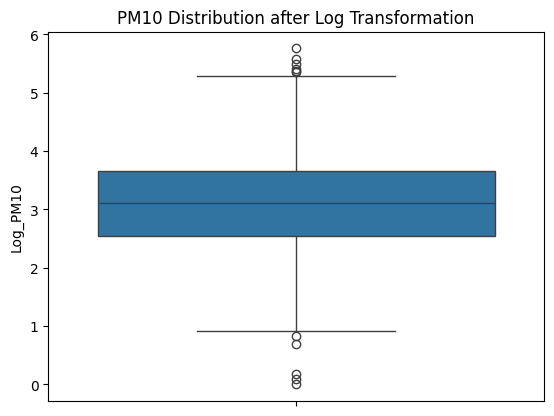

In [189]:
sn.boxplot(dataframe['Log_PM10'])
plt.title('PM10 Distribution after Log Transformation')
plt.show()

Mean and median values are close now. Skewness and Kurtosis value have also decreased. This indicates that the impact of outliers have reduced and the distribution is more normal now.

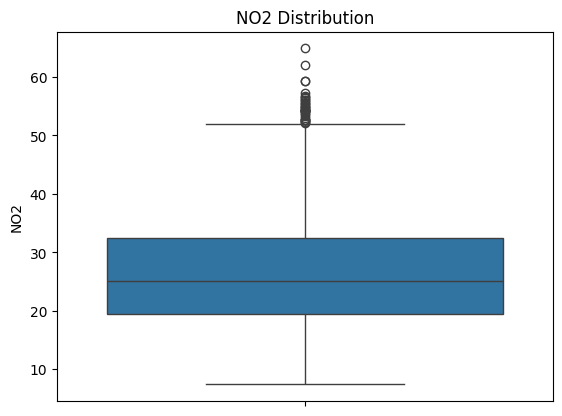

In [190]:
# FEATURE 5-NO2

sn.boxplot(dataframe['NO2'])
plt.title('NO2 Distribution')
plt.show()

In [191]:
print("Mean: ", dataframe['NO2'].mean())
print("Median: ", dataframe['NO2'].median())
print("Skewness:  ", skew(dataframe['NO2']))
print("Kurtosis: ", kurtosis(dataframe['NO2']))

Mean:  26.399670588235296
Median:  25.0
Skewness:   0.6343292819207506
Kurtosis:  0.01137751820492916


NO2 feature is also right skewed, but not highly. Kurtosis value is low indicating that the number of extreme outliers are low.

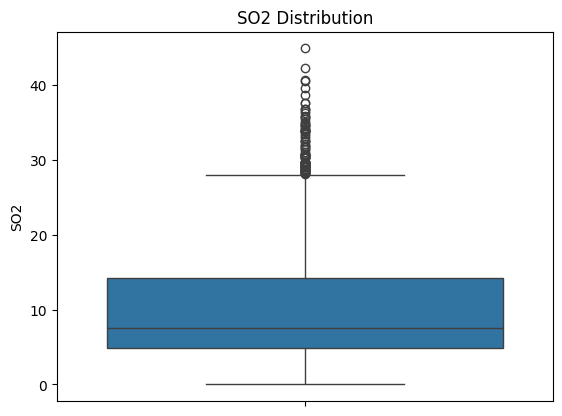

In [192]:
# FEATURE 6-SO2

sn.boxplot(dataframe['SO2'])
plt.title('SO2 Distribution')
plt.show()

In [193]:
print("Mean: ", dataframe['SO2'].mean())
print("Median: ", dataframe['SO2'].median())
print("Skewness:  ", skew(dataframe['SO2']))
print("Kurtosis: ", kurtosis(dataframe['SO2']))

Mean:  10.052399999999999
Median:  7.5
Skewness:   1.2012900250113918
Kurtosis:  1.1134892704286274


The data points are right-skewed. Kurtosis values indicate that few extreme outliers do exist.

In [194]:
dataframe['Log_SO2'] = dataframe['SO2'].apply(lambda x:np.log(x+1))

In [195]:
print("Mean: ", dataframe['Log_SO2'].mean())
print("Median: ", dataframe['Log_SO2'].median())
print("Skewness:  ", skew(dataframe['Log_SO2']))
print("Kurtosis: ", kurtosis(dataframe['Log_SO2']))

Mean:  2.2073962897806974
Median:  2.1400661634962708
Skewness:   -0.11445423544109387
Kurtosis:  -0.23439882639170984


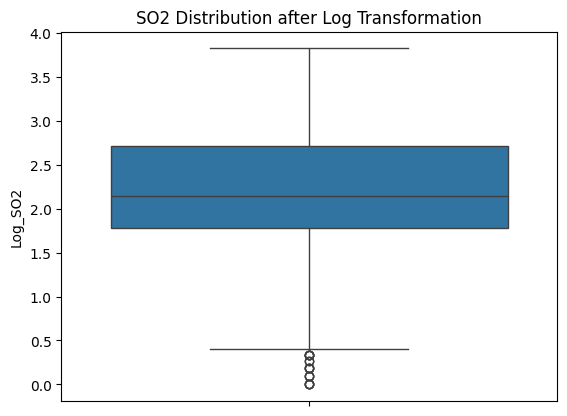

In [196]:
sn.boxplot(dataframe['Log_SO2'])
plt.title('SO2 Distribution after Log Transformation')
plt.show()

The mean and median values are close now. The skewness have slightly reduced and the impact of outliers have significantly reduced.

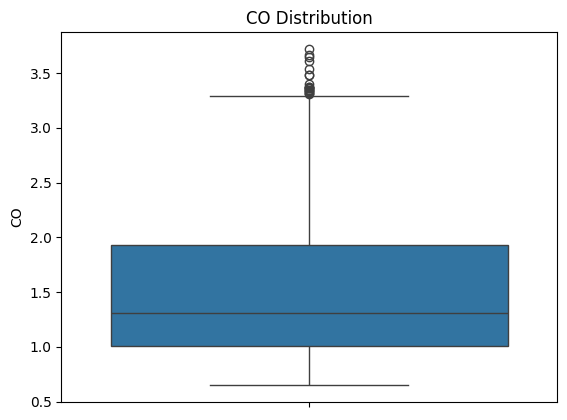

In [197]:
# FEATURE 7 - CO

sn.boxplot(dataframe['CO'])
plt.title('CO Distribution')
plt.show()

In [198]:
print("Mean: ", dataframe['CO'].mean())
print("Median: ", dataframe['CO'].median())
print("Skewness:  ", skew(dataframe['CO']))
print("Kurtosis: ", kurtosis(dataframe['CO']))

Mean:  1.5004282352941176
Median:  1.31
Skewness:   0.8347303653779247
Kurtosis:  -0.16653756858754454


Mean and median values are close. The data is lightly right-skewed. The number of outliers in this feature is lower compared to other features.

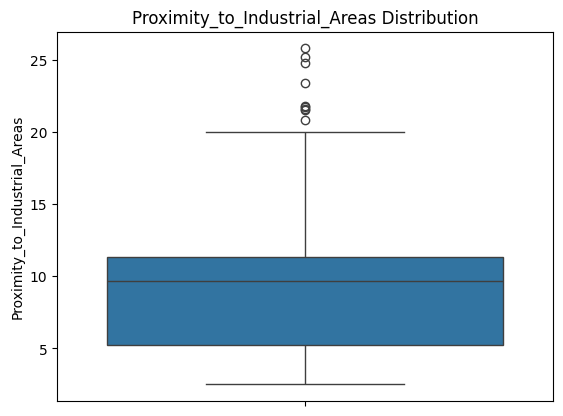

In [199]:
# FEATURE 8- PROXIMITY TO INDUSTRIAL AREAS

sn.boxplot(dataframe['Proximity_to_Industrial_Areas'])
plt.title('Proximity_to_Industrial_Areas Distribution')
plt.show()

In [200]:
print("Mean: ", dataframe['Proximity_to_Industrial_Areas'].mean())
print("Median: ", dataframe['Proximity_to_Industrial_Areas'].median())
print("Skewness:  ", skew(dataframe['Proximity_to_Industrial_Areas']))
print("Kurtosis: ", kurtosis(dataframe['Proximity_to_Industrial_Areas']))

Mean:  8.68421176470588
Median:  9.7
Skewness:   0.3018648240635678
Kurtosis:  -0.45049497497736724


Median is greater than mean value. This indicates that the data is left-skewed. The presence of extreme outliers is less.

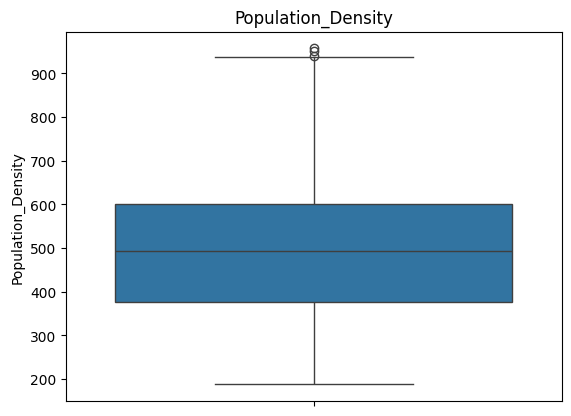

In [201]:
# FEATURE 9- POPULATION DENSITY

sn.boxplot(dataframe['Population_Density'])
plt.title('Population_Density')
plt.show()

In [202]:
print("Mean: ", dataframe['Population_Density'].mean())
print("Median: ", dataframe['Population_Density'].median())
print("Skewness:  ", skew(dataframe['Population_Density']))
print("Kurtosis: ", kurtosis(dataframe['Population_Density']))

Mean:  497.2830588235294
Median:  494.0
Skewness:   0.21759603861002536
Kurtosis:  -0.5343709402156684


The data is lightly right-skewed. There are no much extreme outliers in the data as indicated by kurtosis value.

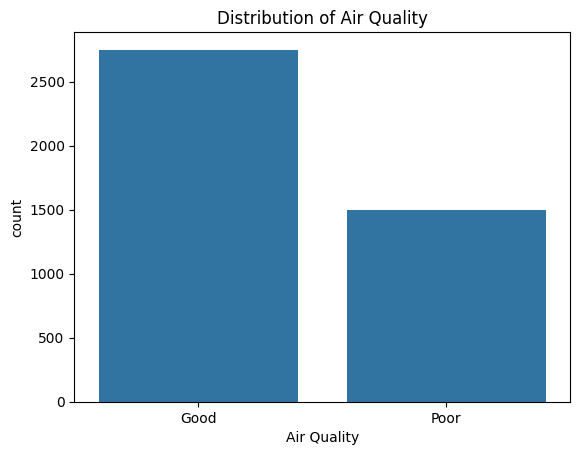

In [203]:
#feature 9 - Air Quality
sn.countplot(x=dataframe['Air Quality'])
plt.title('Distribution of Air Quality')
plt.show()

In [204]:
counts=dataframe['Air Quality'].value_counts()
print(counts)

Air Quality
Good    2750
Poor    1500
Name: count, dtype: int64


The data samples for 'Air Quality' being 'Good' is more than the samples for 'Air Quality' being 'Poor'.

Trying to do the predictions with log transformed features:

In [205]:
dataframe.columns

Index(['Temperature', 'Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO',
       'Proximity_to_Industrial_Areas', 'Population_Density', 'Air Quality',
       'Log_PM2.5', 'Log_PM10', 'Log_SO2'],
      dtype='object')

In [206]:
dataframe['Air Quality'] = dataframe['Air Quality'].map({'Good':1, 'Poor':0}) #encoding of categorical data

log_features=['Temperature', 'Humidity', 'Log_PM2.5', 'Log_PM10', 'NO2',
       'Log_SO2', 'CO', 'Proximity_to_Industrial_Areas',
       'Population_Density']
X=dataframe[log_features]
Y=dataframe['Air Quality']

scaler = MinMaxScaler()
scaling= scaler.fit_transform(X)
X=pd.DataFrame(scaling)

x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=42)

In [207]:
logisticregression(x_train=x_train,y_train=y_train,x_test=x_test,y_test=y_test)

Training Accuracy 0.971764705882353
Testing Accuracy 0.9694117647058823


In [208]:
randomforest(x_train=x_train,y_train=y_train,x_test=x_test,y_test=y_test)

Training Accuracy 0.9764705882352941
Testing Accuracy 0.971764705882353


The testing and training accuracy is almost same as before the log transformations were performed. This indicate that the presence of outliers were not effecting the model significantly earlier.

Trying to remove outliers:

In [209]:
dataframe_dummy=dataframe

In [210]:
dataframe_dummy.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality,Log_PM2.5,Log_PM10,Log_SO2
0,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,1,1.960095,1.987874,1.840550
1,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,1,2.066863,2.833213,1.887070
2,39.4,96.6,14.6,35.5,42.9,17.9,1.82,3.1,674,0,2.747271,3.597312,2.939162
3,41.7,82.5,1.7,15.8,31.1,12.7,1.80,4.6,735,0,0.993252,2.821379,2.617396
4,29.4,93.8,10.3,22.7,45.1,11.8,2.03,5.4,486,0,2.424803,3.165475,2.549445


In [211]:
check=['PM2.5','PM10','SO2']
for i in check:
    Q1 = dataframe_dummy[i].quantile(0.25)
    Q3 = dataframe_dummy[i].quantile(0.75)
    IQR=Q3-Q1
    upperbound=Q3+1.5*IQR
    dataframe_dummy = dataframe_dummy [dataframe_dummy[i]<=upperbound]

In [212]:
x= dataframe_dummy.drop(['Air Quality','Log_PM10', 'Log_PM2.5','Log_SO2'], axis=1)
y=dataframe_dummy['Air Quality']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,stratify=y,random_state=42)

In [213]:
x.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density
0,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551
1,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303
2,39.4,96.6,14.6,35.5,42.9,17.9,1.82,3.1,674
3,41.7,82.5,1.7,15.8,31.1,12.7,1.80,4.6,735
4,29.4,93.8,10.3,22.7,45.1,11.8,2.03,5.4,486


In [214]:

logisticregression(x_train=x_train,y_train=y_train,x_test=x_test,y_test=y_test)

Training Accuracy 0.9762470308788599
Testing Accuracy 0.9782903663500678


c:\Users\338569\Desktop\Hackathon\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [215]:
y.head()

0    1
1    1
2    0
3    0
4    0
Name: Air Quality, dtype: int64

In [216]:
randomforest(x_train=x_train,y_train=y_train,x_test=x_test,y_test=y_test)

Training Accuracy 0.9742110620970479
Testing Accuracy 0.9782903663500678


The training accuracies in the model have reduced slightly which shows that the model is able to generalize data little more better.

CApping

In [217]:
dataframe_dummy2=dataframe

In [218]:
dataframe_dummy2.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality,Log_PM2.5,Log_PM10,Log_SO2
0,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,1,1.960095,1.987874,1.840550
1,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,1,2.066863,2.833213,1.887070
2,39.4,96.6,14.6,35.5,42.9,17.9,1.82,3.1,674,0,2.747271,3.597312,2.939162
3,41.7,82.5,1.7,15.8,31.1,12.7,1.80,4.6,735,0,0.993252,2.821379,2.617396
4,29.4,93.8,10.3,22.7,45.1,11.8,2.03,5.4,486,0,2.424803,3.165475,2.549445


In [219]:
dataframe_dummy2.columns

Index(['Temperature', 'Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO',
       'Proximity_to_Industrial_Areas', 'Population_Density', 'Air Quality',
       'Log_PM2.5', 'Log_PM10', 'Log_SO2'],
      dtype='object')

In [220]:


check=['PM2.5','PM10','SO2']
for i in check:
    Q1 = dataframe_dummy2[i].quantile(0.25)
    Q3 = dataframe_dummy2[i].quantile(0.75)
    IQR=Q3-Q1
    lowerbound=Q3-1.5*IQR
    upperbound=Q3+1.5*IQR
    dataframe_dummy2[i] = dataframe_dummy2[i].apply(lambda x:lowerbound if x<lowerbound else upperbound if x>upperbound else x)

In [221]:
dataframe.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality,Log_PM2.5,Log_PM10,Log_SO2
0,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,1,1.960095,1.987874,1.840550
1,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,1,2.066863,2.833213,1.887070
2,39.4,96.6,14.6,35.5,42.9,17.9,1.82,3.1,674,0,2.747271,3.597312,2.939162
3,41.7,82.5,1.7,15.8,31.1,12.7,1.80,4.6,735,0,0.993252,2.821379,2.617396
4,29.4,93.8,10.3,22.7,45.1,11.8,2.03,5.4,486,0,2.424803,3.165475,2.549445


In [222]:
x= dataframe_dummy2.drop(['Air Quality','Log_PM10', 'Log_PM2.5','Log_SO2'], axis=1)
y=dataframe_dummy2['Air Quality']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,stratify=y,random_state=42)

In [223]:
logisticregression(x_train=x_train,y_train=y_train,x_test=x_test,y_test=y_test)

Training Accuracy 0.9773529411764705
Testing Accuracy 0.9741176470588235


In [224]:
randomforest(x_train=x_train,y_train=y_train,x_test=x_test,y_test=y_test)

Training Accuracy 0.976764705882353
Testing Accuracy 0.9741176470588235


<span style="font-size: 22px; font-weight:bold;">BIVARIATE ANALYSIS</span>

In [225]:
dataframe_dummy.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality,Log_PM2.5,Log_PM10,Log_SO2
0,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,1,1.960095,1.987874,1.840550
1,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,1,2.066863,2.833213,1.887070
2,39.4,96.6,14.6,35.5,42.9,17.9,1.82,3.1,674,0,2.747271,3.597312,2.939162
3,41.7,82.5,1.7,15.8,31.1,12.7,1.80,4.6,735,0,0.993252,2.821379,2.617396
4,29.4,93.8,10.3,22.7,45.1,11.8,2.03,5.4,486,0,2.424803,3.165475,2.549445


In [226]:
dataframe=dataframe_dummy

In [227]:
dataframe=dataframe.drop(['Log_PM2.5', 'Log_PM10', 'Log_SO2'],axis=1)

In [228]:
dataframe.columns

Index(['Temperature', 'Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO',
       'Proximity_to_Industrial_Areas', 'Population_Density', 'Air Quality'],
      dtype='object')

In [229]:
dataframe.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,1
1,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,1
2,39.4,96.6,14.6,35.5,42.9,17.9,1.82,3.1,674,0
3,41.7,82.5,1.7,15.8,31.1,12.7,1.80,4.6,735,0
4,29.4,93.8,10.3,22.7,45.1,11.8,2.03,5.4,486,0


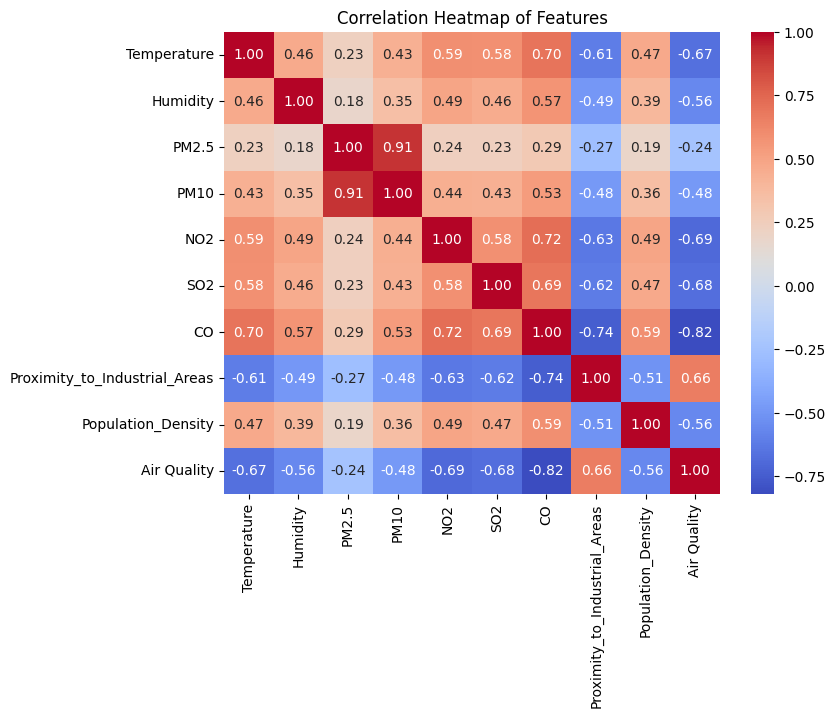

In [230]:
check=['Temperature', 'Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO',
       'Proximity_to_Industrial_Areas', 'Population_Density', 'Air Quality']
correlation_matrix=dataframe_dummy[check].corr()
plt.figure(figsize=(8,6))
sn.heatmap(correlation_matrix,annot=True,cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Features')
plt.show()

This heatmap shows that PM2.5 and PM10 have high positive correlation.

<span style="font-size: 22px; font-weight:bold;">FEATURE ENGINEERING</span>

Since PM2.5 and PM10 are highly correlated, tried creating another feature that can represent both the features.

In [231]:
dataframe['PM']= dataframe['PM2.5'] - dataframe['PM10'] 

In [232]:
dataframe.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality,PM
0,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,1,-0.2
1,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,1,-9.1
2,39.4,96.6,14.6,35.5,42.9,17.9,1.82,3.1,674,0,-20.9
3,41.7,82.5,1.7,15.8,31.1,12.7,1.80,4.6,735,0,-14.1
4,29.4,93.8,10.3,22.7,45.1,11.8,2.03,5.4,486,0,-12.4


In [233]:
dataframe.columns

Index(['Temperature', 'Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO',
       'Proximity_to_Industrial_Areas', 'Population_Density', 'Air Quality',
       'PM'],
      dtype='object')

In [234]:
new_features=['Temperature', 'Humidity', 'NO2', 'SO2', 'CO',
       'Proximity_to_Industrial_Areas', 'Population_Density', 'PM']

xset=dataframe.drop(columns=['Air Quality','PM2.5', 'PM10'])
yset=dataframe['Air Quality']
print(xset.columns)
scaler = MinMaxScaler()
scaling= scaler.fit_transform(xset)
xset=pd.DataFrame(scaling, columns=xset.columns)

x_train, x_test, y_train, y_test = train_test_split(xset,yset,test_size=0.2,stratify=yset,random_state=42)

Index(['Temperature', 'Humidity', 'NO2', 'SO2', 'CO',
       'Proximity_to_Industrial_Areas', 'Population_Density', 'PM'],
      dtype='object')


In [235]:
xset.columns

Index(['Temperature', 'Humidity', 'NO2', 'SO2', 'CO',
       'Proximity_to_Industrial_Areas', 'Population_Density', 'PM'],
      dtype='object')

In [236]:
logisticregression(x_train=x_train,y_train=y_train,x_test=x_test,y_test=y_test)

Training Accuracy 0.9748897183576518
Testing Accuracy 0.9755766621438263


In [237]:
randomforest(x_train=x_train,y_train=y_train,x_test=x_test,y_test=y_test)

Training Accuracy 0.9779436715303699
Testing Accuracy 0.9810040705563093


Now there is a slight increase in the accuracy, compared to the accuracy before feature engineering.

In [238]:
dataframe=dataframe.drop(['PM10','PM2.5'],axis=1)

In [239]:
dataframe.head()

,Temperature,Humidity,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality,PM
0,27.1,39.1,13.5,5.3,1.15,11.1,551,1,-0.2
1,26.5,70.7,21.9,5.6,1.01,12.7,303,1,-9.1
2,39.4,96.6,42.9,17.9,1.82,3.1,674,0,-20.9
3,41.7,82.5,31.1,12.7,1.80,4.6,735,0,-14.1
4,29.4,93.8,45.1,11.8,2.03,5.4,486,0,-12.4


<span style="font-size: 22px; font-weight:bold;">FEATURE SELECTION</span>

<span style="font-size: 17px; font-weight:bold;">Checking feature importance in Logistic Regression:</span>

Before Feature Engineering:

Feature Importance :
                         Feature  Coefficient  Importance
6                             CO    -9.287396    9.287396
4                            NO2    -5.998354    5.998354
5                            SO2    -4.733158    4.733158
0                    Temperature    -4.480164    4.480164
7  Proximity_to_Industrial_Areas     3.935741    3.935741
1                       Humidity    -3.631047    3.631047
8             Population_Density    -3.408653    3.408653
3                           PM10    -2.050424    2.050424
2                          PM2.5    -0.698130    0.698130


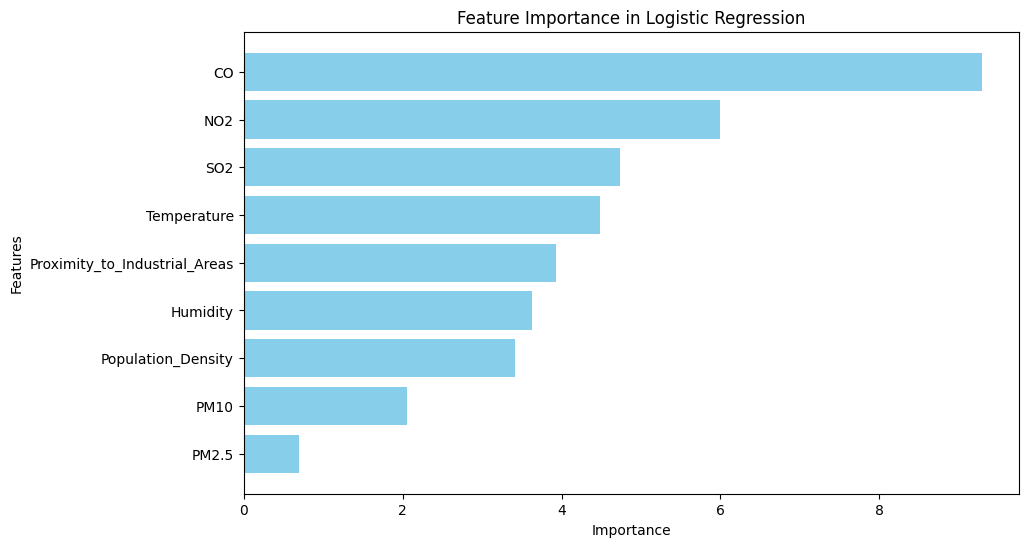

In [240]:
featurename= X_train.columns
coeff=model1.coef_[0]
features=pd.DataFrame({'Feature':featurename,'Coefficient':coeff})
features['Importance']=np.abs(features['Coefficient'])
features=features.sort_values(by='Importance', ascending=False)
print("Feature Importance :")
print(features)

plt.figure(figsize=(10,6))
plt.barh(features['Feature'], features['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance in Logistic Regression')
plt.gca().invert_yaxis()
plt.show()

After Feature Engineering:

Training Accuracy 0.9748897183576518
Testing Accuracy 0.9755766621438263
Feature Importance :
                         Feature  Coefficient  Importance
5                             CO    -8.536271    8.536271
3                            NO2    -5.226918    5.226918
0                    Temperature    -4.098257    4.098257
6  Proximity_to_Industrial_Areas     3.836514    3.836514
2                             PM     3.594356    3.594356
4                            SO2    -3.185597    3.185597
1                       Humidity    -3.156795    3.156795
7             Population_Density    -2.802377    2.802377


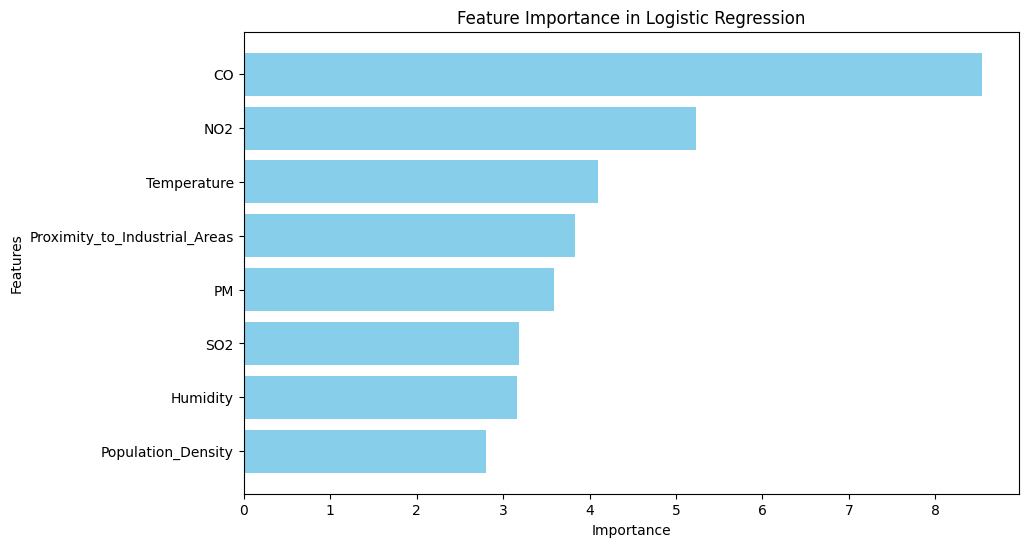

In [241]:
new_features=['Temperature', 'Humidity', 'PM', 'NO2', 'SO2', 'CO',
       'Proximity_to_Industrial_Areas', 'Population_Density']

X=dataframe[new_features]
Y=dataframe['Air Quality']

scaler = MinMaxScaler()
scaling= scaler.fit_transform(X)
X=pd.DataFrame(scaling, columns=X.columns)

x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=42)

model1=LogisticRegression()
model1.fit(x_train, y_train)

training_pred= model1.predict(x_train)
training_accuracy = accuracy_score(y_train, training_pred)
print("Training Accuracy", training_accuracy)
    
predictions= model1.predict(x_test)
accuracy = accuracy_score(y_test, predictions)
print("Testing Accuracy", accuracy )

featurename= x_train.columns
coeff=model1.coef_[0]
features=pd.DataFrame({'Feature':featurename,'Coefficient':coeff})
features['Importance']=np.abs(features['Coefficient'])
features=features.sort_values(by='Importance', ascending=False)
print("Feature Importance :")
print(features)

plt.figure(figsize=(10,6))
plt.barh(features['Feature'], features['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance in Logistic Regression')
plt.gca().invert_yaxis()
plt.show()

<span style="font-size: 17px; font-weight:bold;">Checking feature importance in Random Forest:</span>

Before feature engineering:

Feature Importance
                         Feature  Importance
6                             CO    0.406656
4                            NO2    0.203429
5                            SO2    0.124380
7  Proximity_to_Industrial_Areas    0.120768
0                    Temperature    0.071231
8             Population_Density    0.035784
1                       Humidity    0.027837
3                           PM10    0.007138
2                          PM2.5    0.002777


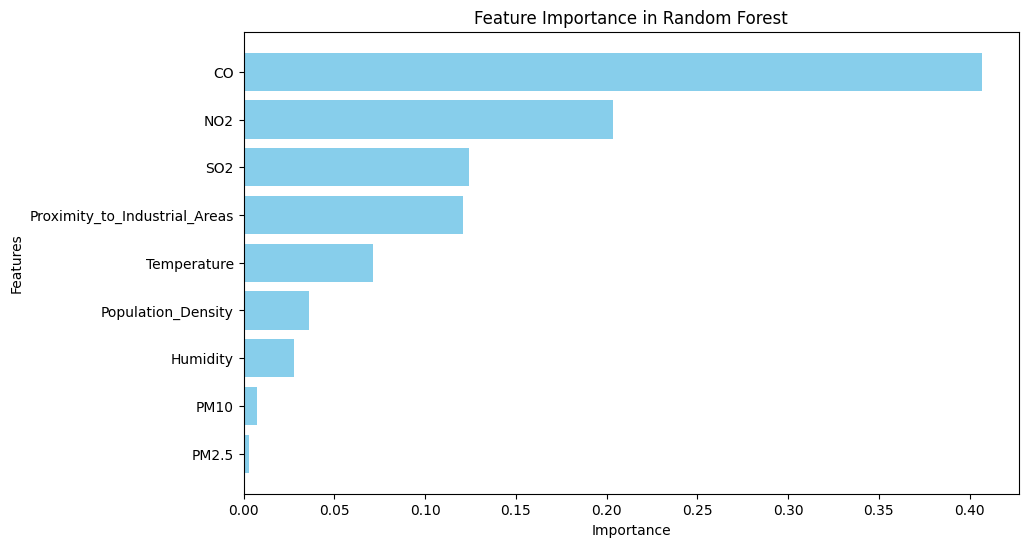

In [242]:
feature_importance=model3.feature_importances_
names=X_train.columns
importance = pd.DataFrame({'Feature':names, 'Importance':feature_importance}).sort_values(by='Importance',ascending=False)
print("Feature Importance")
print(importance)
plt.figure(figsize=(10,6))
plt.barh(importance['Feature'], importance['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance in Random Forest')
plt.gca().invert_yaxis()
plt.show()


After Feature Engineering:

In [243]:
new_features=['Temperature', 'Humidity', 'PM', 'NO2', 'SO2', 'CO',
       'Proximity_to_Industrial_Areas', 'Population_Density']

X=dataframe[new_features]
Y=dataframe['Air Quality']

scaler = MinMaxScaler()
scaling= scaler.fit_transform(X)
X=pd.DataFrame(scaling, columns=X.columns)

x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=42)

Training Accuracy 0.9789616559212758
Testing Accuracy 0.9850746268656716
Feature Importance
                         Feature  Importance
5                             CO    0.299686
6  Proximity_to_Industrial_Areas    0.233601
3                            NO2    0.160340
0                    Temperature    0.101154
4                            SO2    0.090077
2                             PM    0.073848
7             Population_Density    0.025842
1                       Humidity    0.015451


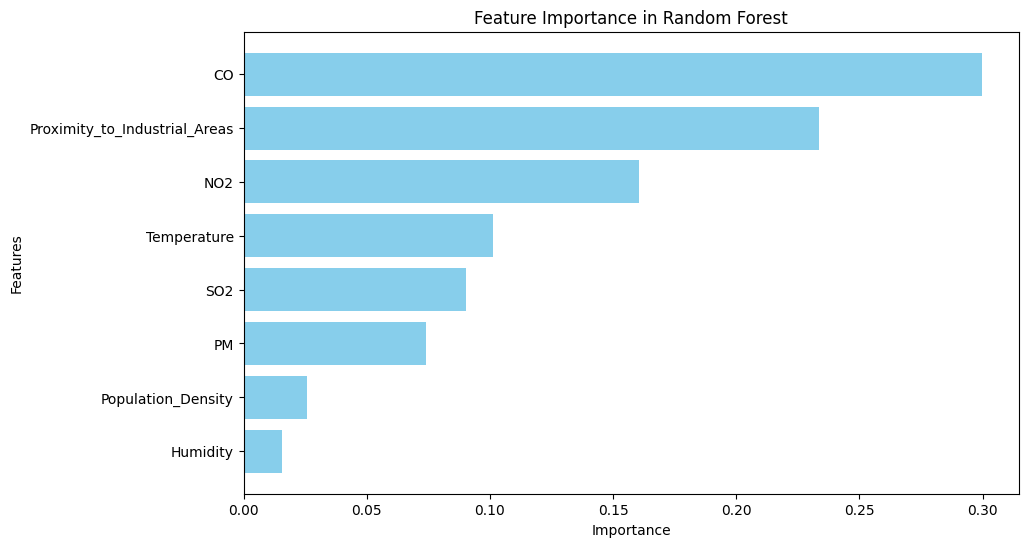

In [244]:
model3_new=RandomForestClassifier(n_estimators=100, max_depth=3,min_samples_split=5, min_samples_leaf=5)
model3_new.fit(x_train, y_train)

training_pred= model3_new.predict(x_train)
training_accuracy = accuracy_score(y_train, training_pred)
print("Training Accuracy", training_accuracy)

test_predictions= model3_new.predict(x_test)
accuracy = accuracy_score(y_test, test_predictions)
print("Testing Accuracy", accuracy )

feature_importance=model3_new.feature_importances_
names=x_train.columns
importance = pd.DataFrame({'Feature':names, 'Importance':feature_importance}).sort_values(by='Importance',ascending=False)
print("Feature Importance")
print(importance)
plt.figure(figsize=(10,6))
plt.barh(importance['Feature'], importance['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance in Random Forest')
plt.gca().invert_yaxis()
plt.show()

As each of the features has its own contribution to the prediction, no features are being removed/dropped.

<span style="font-size: 22px; font-weight:bold;">HYPERPARAMETER TUNING FOR LOGISTIC REGRESSION</span>

In [245]:
parameter_grid={
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty' : ['l2'],
    'solver' : ['liblinear'],
    'max_iter': [100,200,300,400,500]
}

optimized_lr = LogisticRegression()
grid_search = GridSearchCV(optimized_lr, parameter_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)

print("Best parameters : ", grid_search.best_params_)
print("Best Cross validation Accuracy : ", grid_search.best_score_)

Best parameters :  {'C': 10, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Best Cross validation Accuracy :  0.9738706799804323


In [246]:
best_lr=grid_search.best_estimator_
trainpreds=best_lr.predict(x_train)
testpreds=best_lr.predict(x_test)
train_acc=accuracy_score(y_train, trainpreds)
test_acc=accuracy_score(y_test, testpreds)
precision=precision_score(y_test, testpreds)
print("Training Accuracy : ",train_acc)
print("Test Accuracy : ",test_acc)
print("Precision : ", precision)



Training Accuracy :  0.9755683746182559
Test Accuracy :  0.9823609226594301
Precision :  0.9870609981515711


Testing accuracy has improved. But there is a significant gap between testing accuracy and training accuracy values.

<span style="font-size: 22px; font-weight:bold;">HYPERPARAMETER TUNING FOR RANDOM FOREST</span>

In [247]:
param_grid={ 'n_estimators' :  [10, 25,50,100,200],
             'max_depth' : [ None, 3, 5, 10, 20],
             'min_samples_split' : [10,20,50],
             'min_samples_leaf' : [5,10,15,20],
             'max_features' : ['sqrt', 'log2', None]

}

In [248]:
rf=RandomForestClassifier(random_state=42)

grid_search=GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search.fit(x_train,y_train)

print("Best Parameters : " ,grid_search.best_params_)
best_model=grid_search.best_estimator_
training_pred=best_model.predict(x_train)
y_pred=best_model.predict(x_test)
print("Train Accuracy : ", accuracy_score(y_train,training_pred))
print("Test Accuracy : ", accuracy_score(y_test,y_pred))
precision=precision_score(y_test, y_pred)
print("Precision : ", precision)

Fitting 3 folds for each of 900 candidates, totalling 2700 fits
Best Parameters :  {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 20, 'n_estimators': 200}
Train Accuracy :  0.9850695622667119
Test Accuracy :  0.9864314789687924
Precision :  0.988929889298893


The model that performed better is the Random Forest after hyper-parameter tuning with a accuracy of 98.64%.  



<span style="font-size: 22px; font-weight:bold;">SAVING MODEL USING PICKLE</span>

In [259]:
with open ("air_quality.pkl", 'wb') as f:
    pickle.dump(best_model, f)

with open ('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f) 

In [300]:
with open('air_quality.pkl', 'rb') as f:
    final_model=pickle.load(f)

with open('scaler.pkl', 'rb') as f:
    scaler=pickle.load(f)

In [307]:
input = {
    'Temperature' : 30.5,
    'Humidity': 65.2 ,
    'PM2.5' : 12.5, 
    'PM10' : 20.3,
    'NO2' : 18.5, 
    'SO2' : 5.3, 
    'CO' : 0.95,
    'Proximity_to_Industrial_Areas' : 10.1, 
    'Population_Density' : 400
}

In [308]:
input['PM'] = input['PM2.5'] - input['PM10']


In [309]:
features =[
    input['Temperature'],
    input['Humidity'] ,
    input['PM'], 
    input['NO2'], 
    input['SO2'], 
    input['CO'],
    input['Proximity_to_Industrial_Areas'], 
    input['Population_Density']
]

featurenames=['Temperature', 'Humidity', 'PM', 'NO2', 'SO2', 'CO',
       'Proximity_to_Industrial_Areas', 'Population_Density']

input_df=pd.DataFrame([features], columns=featurenames)

scaled_features=scaler.transform(input_df)
scaled_df=pd.DataFrame(scaled_features,columns=input_df.columns)

In [311]:
prediction=final_model.predict(scaled_df)

if prediction[0]==0:
    print("Air Quality is Poor")

else:
    print("Air Quality is Good")

Air Quality is Good
